# Unsupervised learning algorithms - K-means 
 Done by **Dorota Lączak, AiR, ISZ**

help: 
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

`metrics.silhouette_score(X, labels, metric='euclidean')`

Dunn: jqmcvi
https://github.com/jqmviegas/jqm_cvi/blob/master/jqmcvi/base.py

Inertia:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans


https://scikit-learn.org/stable/modules/clustering.html
 
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html#sphx-glr-auto-examples-cluster-plot-kmeans-stability-low-dim-dense-py

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans


### Ex.1 Please analyse the function parameters and generated output.

In [ ]:
from sklearn.datasets.samples_generator import make_blobs 
 
help(make_blobs)

### Ex.2 Please call make_blob and generate a dataset with 120 samples, 2 features, 4 centres (clusters), and cluster_std=0.40.


In [2]:
X, y = make_blobs(n_samples=120, centers=4, n_features=2, cluster_std=0.4)

### Ex.3 Analyse the x and y shape.


In [3]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (120, 2)
y shape: (120,)


###  Ex.4 Plot the data samples in X to see the clusters.
All sklearn algorithms have a similar way of running:
- initialize the algorithm
- fit the model
- predict the outcome for the data

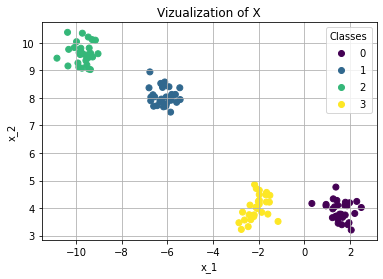

In [16]:
import matplotlib.pyplot as plt

scatter_plt = plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Vizualization of X")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt.legend_elements(),  title="Classes")

#### Ex.5 Run the implemented KMeans function K-Means, fit the model and predict the outcome.


In [18]:
from sklearn.cluster import KMeans
k_means = KMeans(init='random', n_clusters=4)
k_means.fit(X)

y_pred = k_means.predict(X)

#### Ex.6 Plot the results in order to see whether the clustering worked.


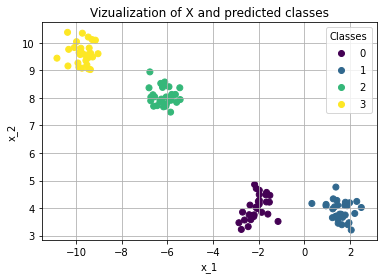

In [50]:

scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Vizualization of X and predicted classes")

plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.legend(*scatter_plt_pred.legend_elements(),  title="Classes")

Text(0, 0.5, 'x_2')

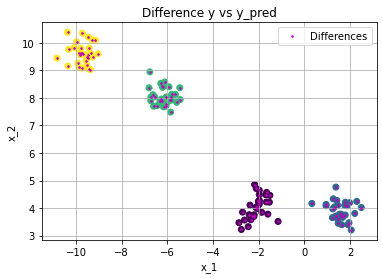

In [58]:
# Initialise the different array to all False
import numpy as np

scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)

different = (y == 5)
# ax = fig.add_subplot(1, 3, 3)
different = (y == 5)
for k in np.unique(y):
    different += ((y == k) != (y_pred == k))

identic = np.logical_not(different)
plt.plot(X[different, 0], X[different, 1],
        color='m', marker='.', linewidth=0, markersize =3)
plt.title('Difference y vs y_pred')
plt.legend (['Differences'])

plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")

#### Ex.7 Calculate inertia Inertia_ or Dunn index Package jgmcvi.


In [22]:
print(f"Inertia is: {k_means.inertia_}")

Inertia is: 34.99137195989835


In [59]:
# From jqmcvi https://github.com/jqmviegas/jqm_cvi/blob/master/jqmcvi/base.py

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di


In [68]:

clusters = [X[k_means.labels_== i] for i in np.unique(y_pred)]
print(f"Dunn metris is : {dunn(clusters)}")


Dunn metris is : 0.7462151165027274


# K-means clustering - example II
Change the parameters of our data generation process to create different-looking clusters (eg. about 5 clusters and cluster_std=0.8).

#### Ex.1 Plot the data

In [69]:
X, y = make_blobs(n_samples=200, centers=5, n_features=2, cluster_std=0.8)

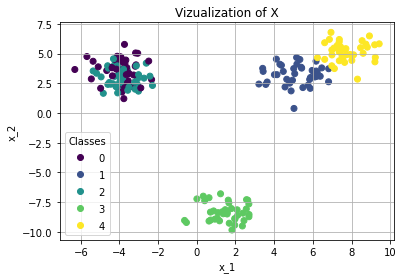

In [70]:
scatter_plt = plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Vizualization of X")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt.legend_elements(),  title="Classes")

#### Ex.2 Predict for the same nb. of clusters = 5.


In [85]:
k_means_5 = KMeans(init='random', n_clusters=5)
k_means_5.fit(X)

y_pred = k_means_5.predict(X)

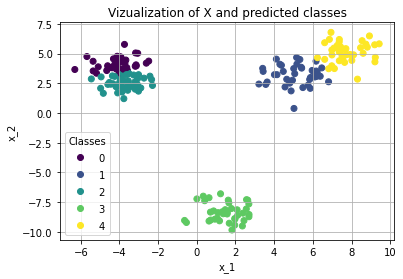

In [86]:
scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Vizualization of X and predicted classes")

plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.legend(*scatter_plt_pred.legend_elements(),  title="Classes")

Text(0, 0.5, 'x_2')

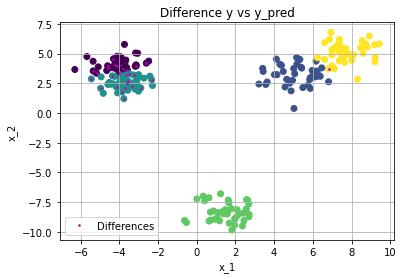

In [87]:
scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)

different = (y == 5)
# ax = fig.add_subplot(1, 3, 3)
different = (y == 5)
for k in np.unique(y):
    different += ((y == k) != (y_pred == k))

identic = np.logical_not(different)
plt.plot(X[different, 0], X[different, 1],
        color='m', marker='.', linewidth=0, markersize =3)
plt.title('Difference y vs y_pred')
plt.legend (['Differences'])

plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")

#### Ex.3 Predict for 2 instead of 5 clusters.


In [78]:
k_means_2 = KMeans(init='random', n_clusters=2)
k_means_2.fit(X)

y_pred = k_means_2.predict(X)

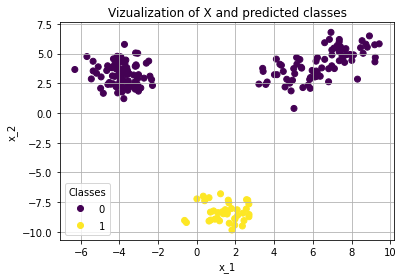

In [79]:
scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Vizualization of X and predicted classes")

plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.legend(*scatter_plt_pred.legend_elements(),  title="Classes")

#### Ex.4 Calculate inertia and Dunn index.

In [80]:
print(f"Inertia for 5 clusters is: {k_means_5.inertia_}")
print(f"Inertia for 2 clusters is: {k_means_2.inertia_}")

print(f"Dunn for 5 clusters is: {dunn([X[k_means_5.labels_== i] for i in range(5)])}")
print(f"Dunn for 2 clusters is: {dunn([X[k_means_2.labels_== i] for i in range(2)])}")

Inertia for 5 clusters is: 235.63095279713326
Inertia for 2 clusters is: 4823.714672365191
Dunn for 5 clusters is: 0.04140401137719024
Dunn for 2 clusters is: 0.5075045333867856


# K-means ++
Remember how we randomly initialize the centroids in k-means clustering? This is also potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, there is an algorithm called K-Means++ that can be used to choose the initial values (discussed during the lecture).


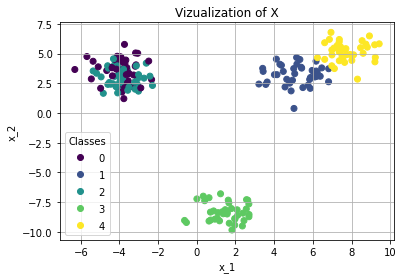

In [91]:
scatter_plt = plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Vizualization of X")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt.legend_elements(),  title="Classes")

#### Ex.1 Run K-Means for the previous ex. while changing the parameter in KMeans function:

`init='k-means++'`


In [94]:
k_means_5_plusplus = KMeans(init ='k-means++', n_clusters=5)
k_means_5_plusplus.fit(X)

y_pred = k_means_5_plusplus.predict(X)

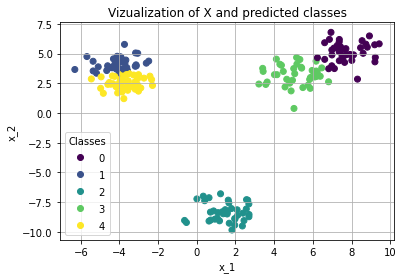

In [95]:
scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Vizualization of X and predicted classes")

plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.legend(*scatter_plt_pred.legend_elements(),  title="Classes")

Text(0, 0.5, 'x_2')

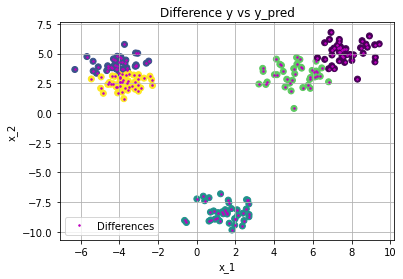

In [96]:
scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)

different = (y == 5)
# ax = fig.add_subplot(1, 3, 3)
different = (y == 5)
for k in np.unique(y):
    different += ((y == k) != (y_pred == k))

identic = np.logical_not(different)
plt.plot(X[different, 0], X[different, 1],
        color='m', marker='.', linewidth=0, markersize =3)
plt.title('Difference y vs y_pred')
plt.legend (['Differences'])

plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")

#### Ex.2 Calculate inertia and Dunn index.

In [97]:
print(f"Inertia for 5 clusters is: {k_means_5.inertia_}")
print(f"Inertia for 5 clusters kmeans ++ is: {k_means_5_plusplus.inertia_}")

print(f"Dunn for 5 clusters is: {dunn([X[k_means_5.labels_== i] for i in range(5)])}")
print(f"Dunn for 5 clusters kmeans ++ is: {dunn([X[k_means_5_plusplus.labels_== i] for i in range(5)])}")

Inertia for 5 clusters is: 235.48397878834143
Inertia for 5 clusters kmeans ++ is: 235.48397878834143
Dunn for 5 clusters is: 0.04140401137719024
Dunn for 5 clusters kmeans ++ is: 0.04140401137719024


# Ex. 3. Elbow method
Please implement the elbow method to choose the correct parameter value for k.

#### Ex.1 Run K-Means for a range of clusters using a for loop and collecting the distortions (inertia) into a list.




In [99]:
X, y = make_blobs(n_samples=120, centers=5, n_features=2, cluster_std=.4)


In [100]:
inertias = []
for k in range(2, 9):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    inertias.append(k_means.inertia_)

#### Ex.2 Plot the distortions of K-Means.


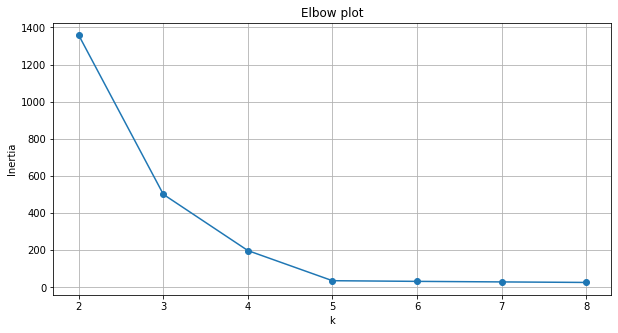

In [105]:
plt.figure(figsize=[10, 5])
plt.plot(range(2,9), inertias, "o-")
plt.title('Elbow plot')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid()


# Ex. 4
Please check whether the K-Means algorithm will correctly cluster the data:

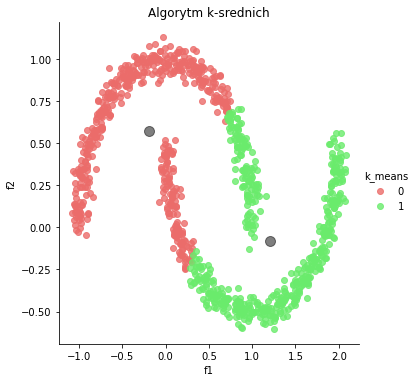

In [107]:
from sklearn.datasets.samples_generator import make_moons
import seaborn as sns
import pandas as pd

 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])
# Kmeans
 
k_means = KMeans(n_clusters=2)
k_means.fit(x)
y_km = k_means.labels_
centers = k_means.cluster_centers_


#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()